# CSCI7000 - Mathematical & Computational Modeling of Infectious Diseases
## Homework 4
- Author: Corey Lynn Murphey
- Instructor: Prof. Dan Larremore
- Deadline: 20 April 2023 

Please note that discussion-based problems are not included in this notebook. You can find those responses in the homework PDF. 

## Libraries Imported

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

## Problem 1


In [2]:
df = pd.read_csv("all_weeks.csv") # Read in csv

weeks = df['Week']
new_cases = df['New Cases']


In [3]:
n = 100000 # number of buffalo in herd
life_span = 100  # weeks
infectious_duration = 2  # weeks

ascertainment = .1 # 10% ascertainment
prevalence_TT = 7/1000 # Ted Turner's prevalence Study
seroprevalence = 517/1000 # Buffalo Bill

### 1.a - Method 1, Week 9

Text(0, 0.5, 'I(t)')

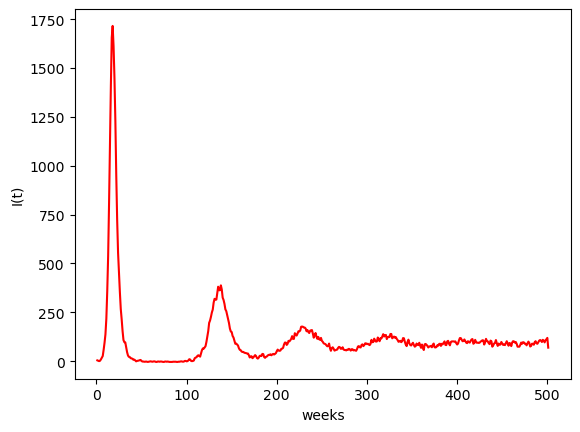

In [4]:
infections = np.zeros(len(new_cases))
infections[0] = new_cases[0]
infections[1] = new_cases[1]

for i in range(2, len(new_cases)):
    infections[i] = infections[i-1] + new_cases[i] - new_cases[i-2]

# plot infections
fig, ax = plt.subplots(1)
ax.plot(weeks,infections, color="red")
ax.set_xlabel("weeks")
ax.set_ylabel("I(t)")


/var/folders/15/s8ldr64x50q5znqbr6dxz1tc0000gp/T/ipykernel_79391/2042431758.py:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(weeks,np.log(infections), color = "red")
/var/folders/15/s8ldr64x50q5znqbr6dxz1tc0000gp/T/ipykernel_79391/2042431758.py:4: RuntimeWarning: invalid value encountered in log
  ax.plot(weeks,np.log(infections), color = "red")


$R_0$ is 1.8337196242796194
95\% CI is 1.6077599704217231 to 2.0596792781375157


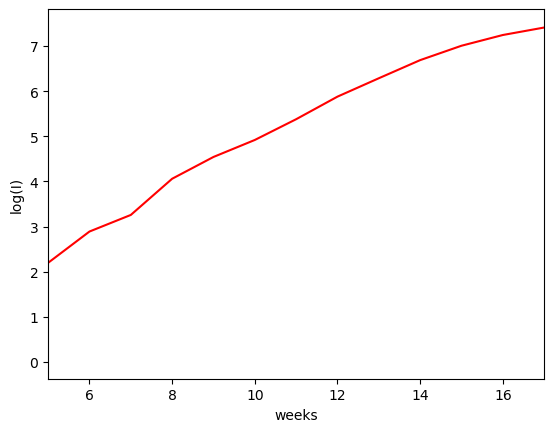

In [5]:
# Calculate the slope during the first growth phase

fig, ax = plt.subplots(1)
ax.plot(weeks,np.log(infections), color = "red")
ax.set_xlabel("weeks")
ax.set_ylabel("log(I)")
ax.set_xlim([5, 17])

gamma = 1/infectious_duration
mu = 1/life_span 

# Calculate the slope during the second growth phase
slope, intercept, r, p, stderr = sp.stats.linregress(
    weeks[5:17], np.log(infections[5:17]))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

R_0 = 1 + slope / (gamma + mu)

print("$R_0$ is {}".format(R_0))

ts = np.abs(sp.stats.t.ppf(p/2, len(infections)))

CI_slope = ts*stderr

R_0_slope_pos = 1 + (slope + CI_slope) / (gamma + mu)
R_0_slope_neg = 1 + (slope - CI_slope) / (gamma + mu)

print("95\% CI is {} to {}".format(R_0_slope_neg, R_0_slope_pos))


$R_0$ is 1.8337196242796194 (with ascertainment)
95\% CI is 1.6077599704217231 to 2.0596792781375157


/var/folders/15/s8ldr64x50q5znqbr6dxz1tc0000gp/T/ipykernel_79391/4032498407.py:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(weeks,np.log((1+ascertainment)*infections), color = "red")
/var/folders/15/s8ldr64x50q5znqbr6dxz1tc0000gp/T/ipykernel_79391/4032498407.py:4: RuntimeWarning: invalid value encountered in log
  ax.plot(weeks,np.log((1+ascertainment)*infections), color = "red")


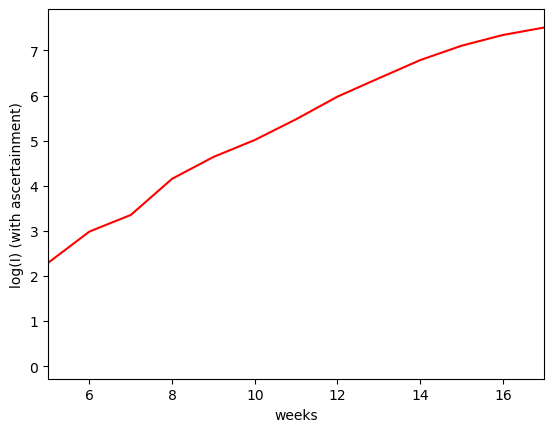

In [6]:
# Calculate the slope during the first growth phase (with ascertainment)

fig, ax = plt.subplots(1)
ax.plot(weeks,np.log((1+ascertainment)*infections), color = "red")
ax.set_xlabel("weeks")
ax.set_ylabel("log(I) (with ascertainment)")
ax.set_xlim([5, 17])

gamma = 1/infectious_duration
mu = 1/life_span # check this

# Calculate the slope during the second growth phase
slope, intercept, r, p, se = sp.stats.linregress(
    weeks[5:17], np.log((1+ascertainment)*infections[5:17]))


R_0 = 1 + slope / (gamma + mu)

print("$R_0$ is {} (with ascertainment)".format(R_0))

ts = np.abs(sp.stats.t.ppf(p/2, len(infections)))

CI_slope = ts*stderr # CI for the slope TODO

R_0_slope_pos = 1 + (slope + CI_slope) / (gamma + mu)
R_0_slope_neg = 1 + (slope - CI_slope) / (gamma + mu)

print("95\% CI is {} to {}".format(R_0_slope_neg, R_0_slope_pos))


$R_t$ is 1.2867108255145219
95\% CI is 1.040149072681305 to 1.5332725783477392


/var/folders/15/s8ldr64x50q5znqbr6dxz1tc0000gp/T/ipykernel_79391/1798036374.py:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(weeks,np.log(infections), color = "red")
/var/folders/15/s8ldr64x50q5znqbr6dxz1tc0000gp/T/ipykernel_79391/1798036374.py:4: RuntimeWarning: invalid value encountered in log
  ax.plot(weeks,np.log(infections), color = "red")


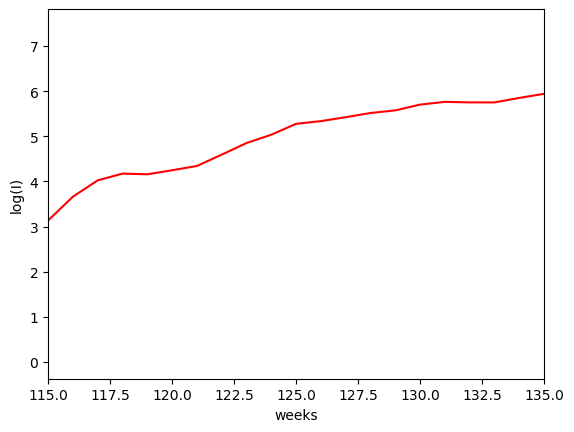

In [7]:
# Calculate the slope during the second growth phase

fig, ax = plt.subplots(1)
ax.plot(weeks,np.log(infections), color = "red")
ax.set_xlabel("weeks")
ax.set_ylabel("log(I)")
ax.set_xlim([115, 135])

gamma = 1/infectious_duration
mu = 1/life_span # check this

# Calculate the slope during the second growth phase
slope, intercept, r, p, se = sp.stats.linregress(
    weeks[115:130], np.log(infections[115:130]))

R_t = 1 + slope / (gamma + mu)

print("$R_t$ is {}".format(R_t))

ts = np.abs(sp.stats.t.ppf(p/2, len(infections)))

CI_slope = ts*stderr

R_0_slope_pos = 1 + (slope + CI_slope) / (gamma + mu)
R_0_slope_neg = 1 + (slope - CI_slope) / (gamma + mu)

print("95\% CI is {} to {}".format(R_0_slope_neg, R_0_slope_pos))


### 1.b - Method 4 

In [8]:
# Method 4
R_0 = 1 / (1 - seroprevalence) # Buffalo Bill's data only

print("$R_0$ is {} (Buffalo Bill's seroprevalence data)".format(R_0))

$R_0$ is 2.070393374741201 (Buffalo Bill's seroprevalence data)


In [9]:
n_sero = 1000
CI_sero_pos = seroprevalence + 1.96*np.sqrt((seroprevalence * (1 - seroprevalence))/n_sero)
CI_sero_neg = seroprevalence - 1.96*np.sqrt((seroprevalence * (1 - seroprevalence))/n_sero)


CI_R0_pos = 1 / (1 - CI_sero_pos)
CI_R0_neg = 1 / (1 - CI_sero_neg)


print("95\% CI is {} to {}".format(CI_R0_neg, CI_R0_pos))

95\% CI is 1.945629752143622 to 2.2122543130294745


### 1.c -  Method 2

In [10]:
# Method 2, rely on i_eq 

rat_gammamu = life_span / infectious_duration

i_eq = np.average(infections[400:500])/n  # divide by n to population proportion
i_eq_std = np.std(infections[400:500])/n

R_0 = 1/(1 - i_eq * (rat_gammamu + 1))

print("$i_eq$ is {}".format(i_eq))
print("$R_0$ is {}".format(R_0))

$i_eq$ is 0.0009532
$R_0$ is 1.0510971983214399


In [11]:
CI_ieq_pos = i_eq + 1.96*i_eq_std/np.sqrt(n)
CI_ieq_neg = i_eq - 1.96*i_eq_std/np.sqrt(n)

CI_R0_pos = 1/(1 - CI_ieq_pos * (rat_gammamu + 1))
CI_R0_neg = 1/(1 - CI_ieq_neg * (rat_gammamu + 1))

print("95\% CI is {} to {}".format(CI_R0_neg, CI_R0_pos))

95\% CI is 1.051060416249491 to 1.051133982967871


#### Estimating i_eq from prevalence

In [12]:
# Method 2, rely on i_eq 

rat_gammamu = life_span / infectious_duration

i_eq =  prevalence_TT # divide by n to population proportion

R_0 = 1/(1 - i_eq * (rat_gammamu + 1))

print("$i_eq$ is {}".format(i_eq))
print("$R_0$ is {}".format(R_0))

$i_eq$ is 0.007
$R_0$ is 1.5552099533437014


In [13]:
n_prev = 1000

CI_prev_pos = prevalence_TT + 1.96*np.sqrt((prevalence_TT * (1 - prevalence_TT))/n_prev)
CI_prev_neg = prevalence_TT - 1.96*np.sqrt((prevalence_TT * (1 - prevalence_TT))/n_prev)


CI_R0_pos = 1/(1 - CI_prev_pos * (rat_gammamu + 1))
CI_R0_neg = 1/(1 - CI_prev_neg * (rat_gammamu + 1))

print("95\% CI is {} to {}".format(CI_R0_neg, CI_R0_pos))

95\% CI is 1.1030928116663554 to 2.6353379999507043


### 1d - Comparison

## Problem 2

### 2a

In [14]:
sensitivity = 0.90
specificity = 0.98

n_maria = 100 # people
positives_maria = 39 # number of positives

In [15]:
pos_percent = positives_maria/n_maria

prevalence_maria = (pos_percent + specificity - 1) / \
    (sensitivity + specificity - 1)  # theta

print("Prevalence is : {}".format(prevalence_maria))

Prevalence is : 0.42045454545454564


### 2b

In [16]:
## 95% confidence interval 
# p +/- z* * \sqrt(p * (1 - p)/n)

CI_pos = prevalence_maria + 1.96*np.sqrt((prevalence_maria * (1 - prevalence_maria))/n_maria)
CI_neg = prevalence_maria - 1.96*np.sqrt((prevalence_maria * (1 - prevalence_maria))/n_maria)

print("Confidence interval is from {} to {}".format(CI_neg, CI_pos))

Confidence interval is from 0.3237026795618456 to 0.5172064113472457


### 2c

In [17]:
n_burt = 50
positives_burt = 18

pos_percent = positives_burt/n_burt

prevalence_burt = (pos_percent + specificity - 1) / \
    (sensitivity + specificity - 1)  # theta

print("Prevalence is : {}".format(prevalence_burt))

## 95% confidence interval
# p +/- z* * \sqrt(p * (1 - p)/n)

CI_pos = prevalence_burt + 1.96*np.sqrt((prevalence_burt * (1 - prevalence_burt))/n_burt)
CI_neg = prevalence_burt - 1.96*np.sqrt((prevalence_burt * (1 - prevalence_burt))/n_burt)

print("Confidence interval is from {} to {}".format(CI_neg, CI_pos))


Prevalence is : 0.38636363636363624
Confidence interval is from 0.25139752491461576 to 0.5213297478126567


### 2d

In [18]:
n = n_burt + n_maria
positives = positives_burt + positives_maria

pos_percent = positives/n

prevalence = (pos_percent + specificity - 1) / \
    (sensitivity + specificity - 1)  # theta

print("Prevalence is : {}".format(prevalence))

## 95% confidence interval
# p +/- z* * \sqrt(p * (1 - p)/n)

CI_pos = prevalence + 1.96 * \
    np.sqrt((prevalence * (1 - prevalence))/n)
CI_neg = prevalence - 1.96 * \
    np.sqrt((prevalence * (1 - prevalence))/n)

print("Confidence interval is from {} to {}".format(CI_neg, CI_pos))



Prevalence is : 0.409090909090909
Confidence interval is from 0.33040794864544276 to 0.48777386953637525


### 2e

In [19]:
prob_testpositive = prevalence * sensitivity + ((1 - prevalence)*(1 - specificity))

# Probability truly positive given that you tested positive
prob_positive = sensitivity * prevalence / prob_testpositive

print("The probability I am actually positive is: {}".format(prob_positive))

The probability I am actually positive is: 0.9688995215311004


## Problem 3

In [20]:
neg = pd.read_csv("HW4_Q3_neg.csv", header=None)  # Read in csv
pos = pd.read_csv("HW4_Q3_pos.csv", header=None)  # Read in csv
all_data = pd.read_csv("HW4_Q3_data.csv", header=None)  # Read in csv

neg[0].to_numpy()
pos[0].to_numpy()
all_data[0].to_numpy();

In [21]:
n = all_data[0].size
n_pos = pos[0].size
n_neg = neg[0].size

### 3a

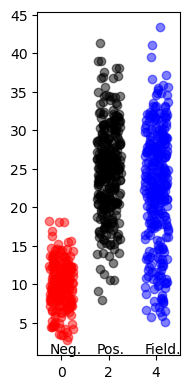

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2, 4))
jitter_neg = np.random.rand(len(neg))
jitter_pos = np.random.rand(len(pos))
jitter_all = np.random.rand(len(all_data))
ax.scatter(-0.5+jitter_neg, neg, alpha=0.5, color='r', label="-")
ax.scatter(1.5+jitter_pos, pos, alpha=0.5, color='k', label = "+")
ax.scatter(3.5+jitter_all, all_data, alpha=0.5, color='b', label = "data")

ax.set_xlim([-1, 5])
ax.annotate("Neg.",(-0.5,1))
ax.annotate("Pos.",(1.5,1))
ax.annotate("Field.",(3.5,1))


plt.tight_layout()

### 3b

In [23]:
def se(c, pos): #specificity
    pos_vals = np.where(pos[0] > c)
    count_pos = pos_vals[0].size
    sensitivity = count_pos / pos[0].size

    return sensitivity

def sp(c, neg): #sensitivity
    neg_vals = np.where(neg[0] < c)
    count_neg = neg_vals[0].size   
    specificity = count_neg / neg[0].size
    return specificity

cs = np.arange(5, 45, 0.1)

youden = np.zeros_like(cs)

for i in range(len(cs)):
    youden[i] = se(cs[i], pos) + sp(cs[i], neg)

cutoff = cs[np.argmax(youden)]
cutoff_ind = np.argmax(youden)
print("Youden cutoff is {}".format(cutoff))


Youden cutoff is 14.799999999999965


Text(0, 0.5, 'Youden Index')

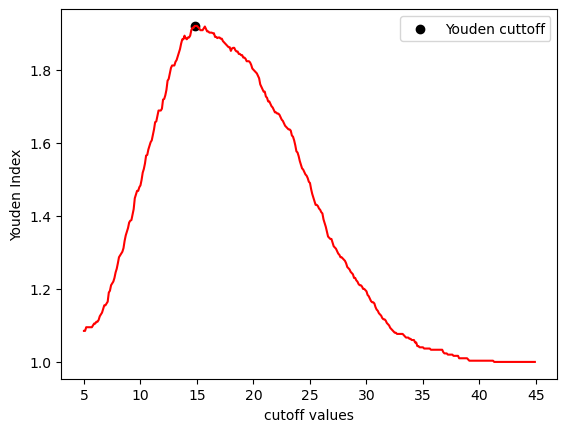

In [24]:
fig, ax = plt.subplots(1)
ax.plot(cs, youden, color="red")
ax.scatter(cutoff, youden[cutoff_ind], label="Youden cuttoff", color="black")
ax.legend()
ax.set_xlabel("cutoff values")
ax.set_ylabel("Youden Index")

In [25]:
def phi(c, all_data):
    pos_vals = np.where(all_data[0] > c)
    count_pos = pos_vals[0].size   
    
    n = all_data[0].size
    raw_prev = count_pos / n
    return raw_prev

def theta(c, all_data, neg, pos):
    phi_c = phi(c, all_data) # raw prevlence
    
    sp_lab = sp(c, neg) #specificity
    se_lab = se(c, pos) #sensitivity
    
    # From notes
    corrected_prev = (phi_c - (1 - sp_lab)) / (se_lab + sp_lab - 1)
    
    return corrected_prev


### 3c

Text(0.5, 1.0, 'Receiver Operator Curve')

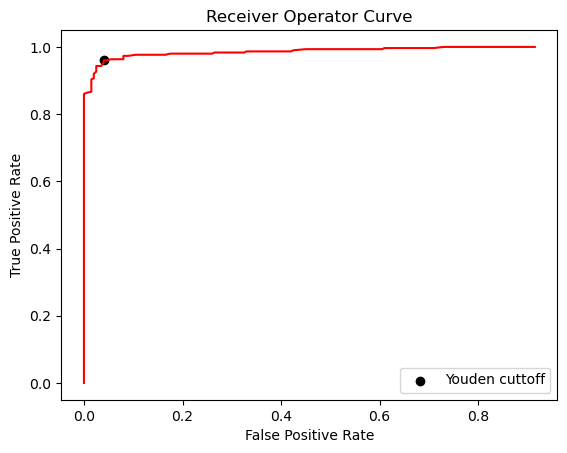

In [26]:
cs = np.arange(5, 45, 0.1)

falsePositive = np.zeros_like(cs) 
truePositive = np.zeros_like(cs) 


for i in range(len(cs)):
    falsePositive[i] = 1 - sp(cs[i], neg)
    truePositive[i] = se(cs[i], pos) 
    

fig, ax = plt.subplots(1)
ax.plot(falsePositive, truePositive, color="red")
ax.scatter(falsePositive[cutoff_ind], truePositive[cutoff_ind], label="Youden cuttoff", color="black")
ax.legend()
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
ax.set_title("Receiver Operator Curve")

Text(0.5, 0, 'cutoff')

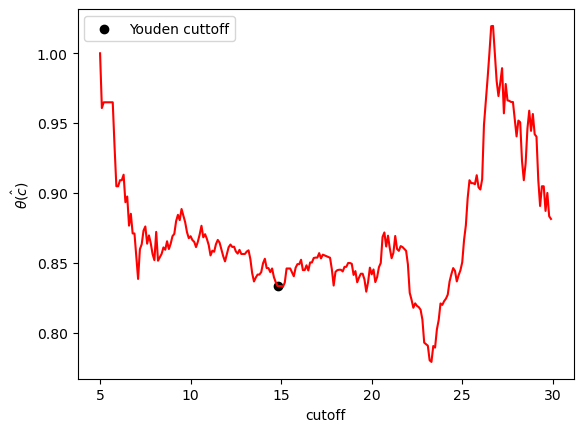

In [27]:
cs = np.arange(5, 30, 0.1)

theta_data = np.zeros_like(cs) 

for i in range(len(cs)):
    theta_data[i] =  theta(cs[i], all_data, neg, pos)
    
    
fig, ax = plt.subplots(1)
ax.plot(cs, theta_data, color="red")
ax.scatter(cs[cutoff_ind], theta_data[cutoff_ind], label="Youden cuttoff", color="black")
ax.legend()
ax.set_ylabel(r'$\hat{\theta(c)}$')
ax.set_xlabel(r'cutoff')